C:\Users\ksaiu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Summary with Mean:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         67.821429  57.214286           46.785714               38.714286   
1        100.210526  28.438596           59.666667               67.684211   
2         94.818182  48.109091           58.818182               34.781818   
3        161.105263  38.473684           85.894737               14.210526   
4        102.756098  28.536585           61.804878               71.097561   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  

Cluster Summary with Additional Statistics:
               Age Annual Income (k$) Spending Score (1-100)      
              mean               mean                   mean count
Cluster                                                           
0        57.214286          46.785714          

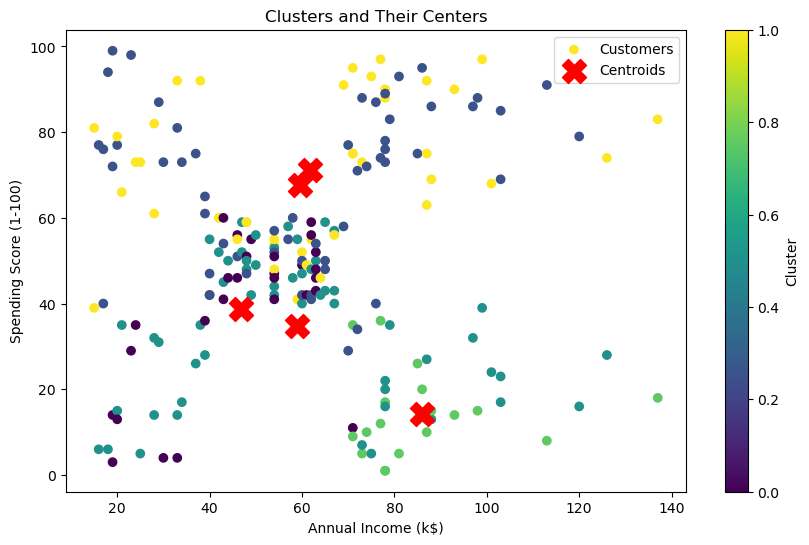

In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
import zipfile

with zipfile.ZipFile('customer-segmentation-tutorial-in-python.zip', 'r') as zip_ref:
    zip_ref.extractall('path_to_extract')
    
# Load the dataset
data = pd.read_csv('path_to_extract/Mall_Customers.csv')

# Drop non-numeric columns (e.g., 'CustomerID', 'Gender') for clustering
data_numeric = data.drop(columns=['CustomerID'])

# Convert 'Gender' column to numeric
data_numeric['Gender'] = data_numeric['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Select numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number']).columns

# Aggregate statistics by cluster
# Ensure only numeric columns are used in aggregation
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Summary with Mean:")
print(cluster_summary)

# Alternatively, include count and other statistics
cluster_summary_agg = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': ['mean', 'count']
})

print("\nCluster Summary with Additional Statistics:")
print(cluster_summary_agg)

# Optional: Plot cluster centers
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=data_numeric.columns)
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', label='Customers')
plt.scatter(centers['Annual Income (k$)'], centers['Spending Score (1-100)'], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters and Their Centers')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()